In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('admission_predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.duplicated().sum()

0

In [5]:
df = df.drop(columns='Serial No.')
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
df = df.rename(columns={'LOR ':'LOR','Chance of Admit ':'Chance_of_Admit','GRE Score':'GRE_Score', 'TOEFL Score':'TOEFL_Score', 'University Rating':'University_Rating'})
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [7]:
continous = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA','Chance_of_Admit']
count = ['Research']

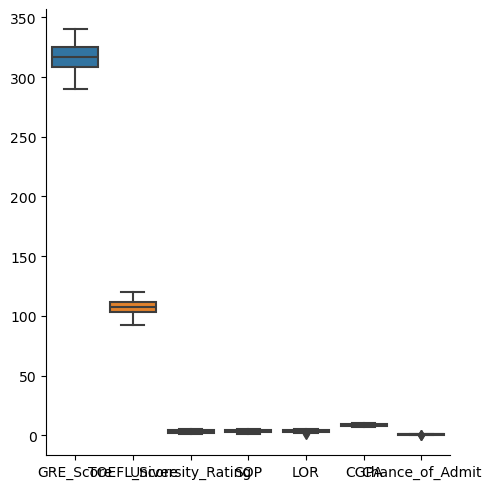

In [8]:
sns.catplot(df[continous],kind='box')
plt.show()

In [9]:
df[continous].describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,0.97000


In [10]:
df['Research'].value_counts()

Research
1    280
0    220
Name: count, dtype: int64

In [11]:
# acc to the above data set data_cleaning and data_trasform is not required

In [12]:
corr = df[['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA','Research']].corr()
corr

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012
University_Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000


<Axes: >

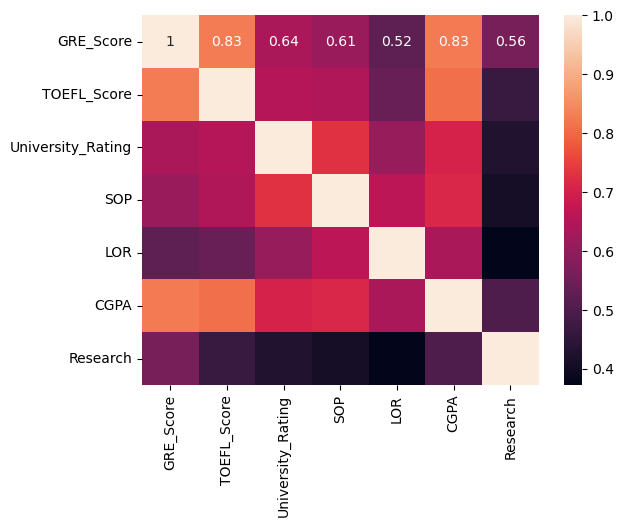

In [13]:
sns.heatmap(corr,annot=True)

In [14]:
# we have multi colinearity problem

In [15]:
import statsmodels.formula.api as smf
rsq_GRE_Score = smf.ols('GRE_Score~TOEFL_Score+University_Rating+SOP+LOR+CGPA+Research',data=df).fit().rsquared
vif_GRE_Score = 1/(1-rsq_GRE_Score)

rsq_TOEFL_Score = smf.ols('TOEFL_Score~GRE_Score+University_Rating+SOP+LOR+CGPA+Research',data=df).fit().rsquared
vif_TOEFL_Score = 1/(1-rsq_TOEFL_Score)

rsq_University_Rating = smf.ols('University_Rating~GRE_Score+TOEFL_Score+SOP+LOR+CGPA+Research',data=df).fit().rsquared
vif_University_Rating = 1/(1-rsq_University_Rating)

rsq_SOP = smf.ols('SOP~GRE_Score+University_Rating+TOEFL_Score+LOR+CGPA+Research',data=df).fit().rsquared
vif_SOP = 1/(1-rsq_SOP)

rsq_LOR = smf.ols('LOR~GRE_Score+University_Rating+SOP+TOEFL_Score+CGPA+Research',data=df).fit().rsquared
vif_LOR = 1/(1-rsq_LOR)

rsq_CGPA = smf.ols('CGPA~GRE_Score+University_Rating+SOP+LOR+TOEFL_Score+Research',data=df).fit().rsquared
vif_CGPA = 1/(1-rsq_CGPA)

rsq_Research = smf.ols('Research~GRE_Score+University_Rating+SOP+LOR+CGPA+TOEFL_Score',data=df).fit().rsquared
vif_Research = 1/(1-rsq_Research)

d1={'variables':['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA','Research'],'vif':[vif_GRE_Score,vif_TOEFL_Score,vif_University_Rating,vif_SOP,vif_LOR,vif_CGPA,vif_Research]}
VIF = pd.DataFrame(d1)
VIF

,variables,vif
0,GRE_Score,4.464249
1,TOEFL_Score,3.904213
2,University_Rating,2.621036
3,SOP,2.835210
4,LOR,2.033555
5,CGPA,4.777992
6,Research,1.494008


In [16]:
df = df.drop(columns='CGPA')
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,1,0.92
1,324,107,4,4.0,4.5,1,0.76
2,316,104,3,3.0,3.5,1,0.72
3,322,110,3,3.5,2.5,1,0.80
4,314,103,2,2.0,3.0,0,0.65
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,1,0.87
496,337,117,5,5.0,5.0,1,0.96
497,330,120,5,4.5,5.0,1,0.93
498,312,103,4,4.0,5.0,0,0.73


In [17]:
df[['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR','Research']].corr()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,Research
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.563398
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.467012
University_Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.372526
Research,0.563398,0.467012,0.427047,0.408116,0.372526,1.000000


In [18]:
rsq_GRE_Score = smf.ols('GRE_Score~TOEFL_Score+University_Rating+SOP+LOR+Research',data=df).fit().rsquared
vif_GRE_Score = 1/(1-rsq_GRE_Score)

rsq_TOEFL_Score = smf.ols('TOEFL_Score~GRE_Score+University_Rating+SOP+LOR+Research',data=df).fit().rsquared
vif_TOEFL_Score = 1/(1-rsq_TOEFL_Score)

rsq_University_Rating = smf.ols('University_Rating~GRE_Score+TOEFL_Score+SOP+LOR+Research',data=df).fit().rsquared
vif_University_Rating = 1/(1-rsq_University_Rating)

rsq_SOP = smf.ols('SOP~GRE_Score+University_Rating+TOEFL_Score+LOR+Research',data=df).fit().rsquared
vif_SOP = 1/(1-rsq_SOP)

rsq_LOR = smf.ols('LOR~GRE_Score+University_Rating+SOP+TOEFL_Score+Research',data=df).fit().rsquared
vif_LOR = 1/(1-rsq_LOR)

rsq_Research = smf.ols('Research~GRE_Score+University_Rating+SOP+LOR+TOEFL_Score',data=df).fit().rsquared
vif_Research = 1/(1-rsq_Research)

d2={'variables':['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR','Research'],'vif':[vif_GRE_Score,vif_TOEFL_Score,vif_University_Rating,vif_SOP,vif_LOR,vif_Research]}
VIF_2 = pd.DataFrame(d2)
VIF_2

,variables,vif
0,GRE_Score,3.763604
1,TOEFL_Score,3.594274
2,University_Rating,2.567679
3,SOP,2.741195
4,LOR,1.944971
5,Research,1.493134


In [19]:
X = df[['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR','Research']] 
Y = df['Chance_of_Admit']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=10)

In [21]:
X_train

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,Research
305,321,109,3,3.5,3.5,1
107,338,117,4,3.5,4.5,1
350,318,107,3,3.0,3.5,1
334,312,107,4,4.5,4.0,1
142,331,115,5,4.0,3.5,1
...,...,...,...,...,...,...
320,317,106,3,4.0,3.5,1
15,314,105,3,3.5,2.5,0
484,317,106,3,3.5,3.0,1
125,300,100,3,2.0,3.0,1


In [22]:
Y_train

305    0.74
107    0.91
350    0.74
334    0.73
142    0.92
       ... 
320    0.75
15     0.54
484    0.73
125    0.64
265    0.71
Name: Chance_of_Admit, Length: 400, dtype: float64

# MODELING

# 1. LINEAR REGRESSION

In [23]:
from sklearn.linear_model import LinearRegression
LinReg_model = LinearRegression()
LinReg_model.fit(X_train,Y_train)

print('coefficient of LinearRegression_model : ',LinReg_model.coef_)
print('intercept of LinearRegression_model : ',LinReg_model.intercept_)

coefficient of LinearRegression_model :  [0.00463852 0.00497961 0.01184293 0.01573491 0.02615324 0.02678064]
intercept of LinearRegression_model :  -1.47565436469722


In [24]:
# prediction on train data(X_train)
ypred_train = LinReg_model.predict(X_train)

# evaluation for train data
# in terms of RMSE
from sklearn.metrics import mean_squared_error
RMSE_train = np.sqrt(mean_squared_error(Y_train,ypred_train))
print('Train RMSE : ',RMSE_train)

# in terms of R2
from sklearn.metrics import r2_score
R2_train = r2_score(Y_train,ypred_train)
print('Train R2 : ',R2_train)

Train RMSE :  0.06811053521115454
Train R2 :  0.7734226183109321


In [25]:
from sklearn.model_selection import cross_val_score
CV = cross_val_score(LinReg_model,X_train,Y_train,cv=5,scoring='r2').mean()
print('CV score : ',CV)           # cv_score always apply on train data.

CV score :  0.7591468902149019


In [26]:
# prediction on test data(X_test)
ypred_test = LinReg_model.predict(X_test)

# evaluation for test data
# in terms of RMSE
from sklearn.metrics import mean_squared_error
RMSE_test = np.sqrt(mean_squared_error(Y_test,ypred_test))
print('Test RMSE : ',RMSE_test)

# in terms of R2
from sklearn.metrics import r2_score
R2_test = r2_score(Y_test,ypred_test)
print('Test R2 : ',R2_test)

Test RMSE :  0.06757963366342522
Test R2 :  0.7357513435995303


In [27]:
# future data prediction.

LinReg_model.predict([[250,120,2,4.5,4.5,1]])

array([0.52049153])

In [28]:
train_error = Y_train-ypred_train

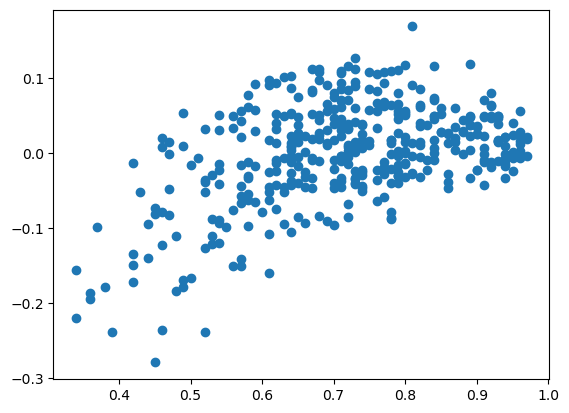

In [29]:
#1 linearity of error

plt.scatter(Y_train,train_error)
plt.show()

In [30]:
#2 Independent of error/variable significant 

import statsmodels.formula.api as smf
m_smm = smf.ols('Y~X',data=df).fit()
m_smm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     272.1
Date:                Sat, 13 Jul 2024   Prob (F-statistic):          6.84e-153
Time:                        12:31:08   Log-Likelihood:                 635.33
No. Observations:                 500   AIC:                            -1257.
Df Residuals:                     493   BIC:                            -1227.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4426      0.118    -12.238      0.000      -1.674      -1.211
X[0]           0.0043      0.001      8.151      0.000       0.003       0.005
X[1]           0.0058      0.001      6.053      0.000       0.004       0.008
X[2]           0.0126      0.004      2.927      0.004       0.004       0.021
X[3]           0.0117      0.005      2.292      0.022       0.002       0.022
X[4]           0.0274      0.005      5.938      0.000       0.018       0.036
X[5]           0.0263      0.008      3.487      0.001       0.011       0.041
==============================================================================
Omnibus:                       86.496   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.545
Skew:                          -1.006   Prob(JB):                     1.67e-34
Kurtosis:                       4.848   Cond. No.                     1.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

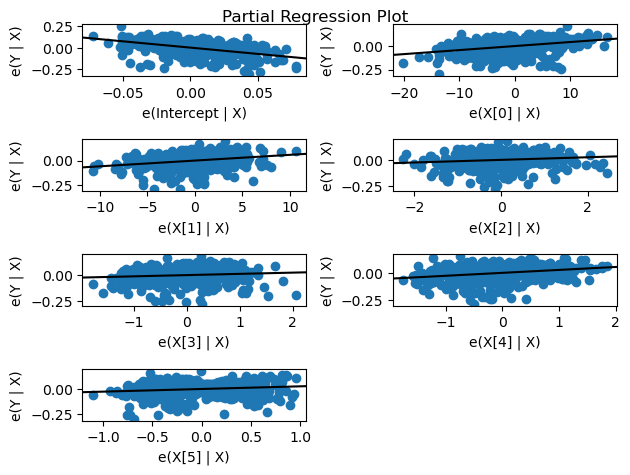

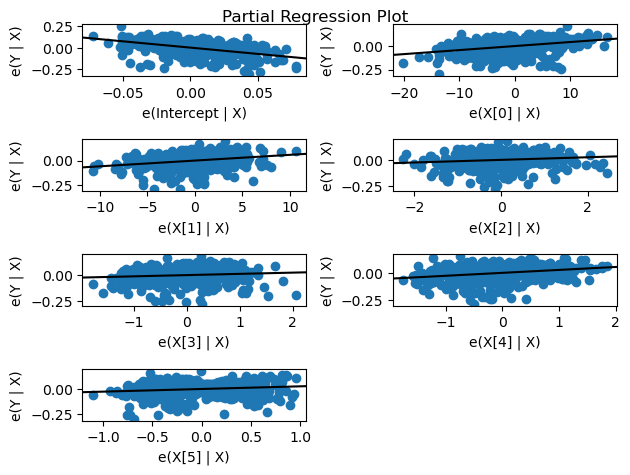

In [31]:
# av plot

import statsmodels.api as sm
sm.graphics.plot_partregress_grid(m_smm)

In [32]:
# from above two cells we conclude that all independent columns used in this model is related to dependent or output variable acc this model.

In [33]:
#3 normality error

train_error.skew()

-0.9410773349007601

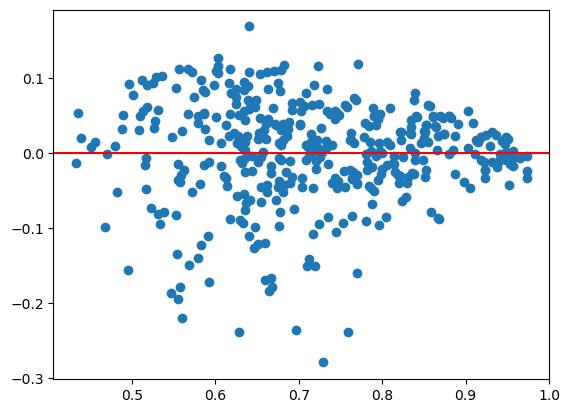

In [34]:
#4 equal varience error

plt.scatter(ypred_train,train_error)
plt.axhline(y=0,color='red')
plt.show()

In [35]:
# This is not a good model, because don't satisfy 4th assumption.

# 2. NON-LINEAR / POLYNOMIAL REGRESSION

In [36]:
from sklearn.model_selection import GridSearchCV

# Model
from sklearn.preprocessing import PolynomialFeatures
estimator = PolynomialFeatures()

# Parameter & Values
param_grid = {'degree':list(range(1,10))}

# Identifying the best value of the parameter(alpha) within the given values for the given data.
# Function store in a variable(model_hyprtu)
model_hyprtu = GridSearchCV(estimator,param_grid,cv=5,scoring='r2')

# Calculate alpha_value acc to highest cv for the given data.
model_hyprtu.fit(X_train,Y_train)

# printing that alpha_value
model_hyprtu.best_params_


{'degree': 1}

In [37]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree = 1,include_bias= False)
X_train_poly = pd.DataFrame(polynomial_converter.fit_transform(X_train))
X_train_poly                            

,0,1,2,3,4,5
0,321.0,109.0,3.0,3.5,3.5,1.0
1,338.0,117.0,4.0,3.5,4.5,1.0
2,318.0,107.0,3.0,3.0,3.5,1.0
3,312.0,107.0,4.0,4.5,4.0,1.0
4,331.0,115.0,5.0,4.0,3.5,1.0
...,...,...,...,...,...,...
395,317.0,106.0,3.0,4.0,3.5,1.0
396,314.0,105.0,3.0,3.5,2.5,0.0
397,317.0,106.0,3.0,3.5,3.0,1.0
398,300.0,100.0,3.0,2.0,3.0,1.0


In [38]:
from sklearn.linear_model import LinearRegression
polymodel = LinearRegression()
polymodel.fit(X_train_poly,Y_train)

print('coefficient : ',polymodel.coef_)
print('intercept : ',polymodel.intercept_)

coefficient :  [0.00463852 0.00497961 0.01184293 0.01573491 0.02615324 0.02678064]
intercept :  -1.47565436469722


In [39]:
ypred_train = polymodel.predict(X_train_poly)

from sklearn.metrics import mean_squared_error
Train_RMSE = np.sqrt(mean_squared_error(Y_train,ypred_train))
print('Train_RMSE : ',Train_RMSE)

from sklearn.metrics import r2_score
R2_train = r2_score(Y_train,ypred_train)
print('Train_R2 : ',R2_train)
# or                                    two ways to calculate r2
polymodel.score(X_train_poly,Y_train)

Train_RMSE :  0.06811053521115452
Train_R2 :  0.7734226183109321


0.7734226183109321

In [40]:
from sklearn.model_selection import cross_val_score
CV = cross_val_score(polymodel,X_train_poly,Y_train,cv=5,scoring='r2').mean()
print('CV score : ',CV)

CV score :  0.7591468902149019


In [41]:
X_test_poly = pd.DataFrame(polynomial_converter.transform(X_test))
X_test_poly       

,0,1,2,3,4,5
0,332.0,116.0,5.0,5.0,5.0,1.0
1,325.0,114.0,5.0,4.0,5.0,1.0
2,326.0,108.0,3.0,3.0,3.5,0.0
3,324.0,111.0,5.0,4.5,4.0,1.0
4,303.0,105.0,5.0,5.0,4.5,0.0
...,...,...,...,...,...,...
95,313.0,98.0,3.0,2.5,4.5,1.0
96,325.0,110.0,2.0,3.0,2.5,1.0
97,331.0,112.0,5.0,4.0,5.0,1.0
98,296.0,95.0,2.0,3.0,2.0,1.0


In [42]:
ypred_test = polymodel.predict(X_test_poly)


Test_RMSE = np.sqrt(mean_squared_error(Y_test,ypred_test))
print('Test_RMSE : ',Test_RMSE)


R2_test = r2_score(Y_test,ypred_test)
print('Test_R2 : ',R2_test)
# or                                    two ways to calculate r2
polymodel.score(X_test_poly,Y_test)

Test_RMSE :  0.06757963366342522
Test_R2 :  0.7357513435995304


0.7357513435995304

In [43]:
# Future Data prediction using Non _linear model

X_future_poly = pd.DataFrame(polynomial_converter.transform([[250,120,2,4.5,4.5,1]]))

polymodel.predict(X_future_poly)

array([0.52049153])

# 3. RIDGE REGRESSION

In [44]:
# appling hypr_tuning for Lasso Regression to selection of alpha . To get best alpha_value(value for any parameter) which give highest CV_score for this given DataSet

from sklearn.model_selection import GridSearchCV

# Model
from sklearn.linear_model import Ridge
estimator = Ridge()

# Parameter & Values
param_grid = {'alpha':list(range(1,200))}

# Identifying the best value of the parameter(alpha) within the given values for the given data.
# Function store in a variable(model_hyprtu)
model_hyprtu = GridSearchCV(estimator,param_grid,cv=5,scoring='r2')

# Calculate alpha_value acc to highest cv for the given data.
model_hyprtu.fit(X_train,Y_train)

# printing that alpha_value
model_hyprtu.best_params_


{'alpha': 29}

In [45]:
from sklearn.linear_model import Ridge
Ridge_model = Ridge(alpha=29)          
Ridge_model.fit(X_train,Y_train)

print('coefficient : ',Ridge_model.coef_)
print('intercept : ',Ridge_model.intercept_)

coefficient :  [0.00488292 0.00512805 0.01183495 0.01528826 0.02390011 0.01903635]
intercept :  -1.5551919599673032


In [46]:
ypred_train = Ridge_model.predict(X_train)

from sklearn.metrics import mean_squared_error
Tra_RMSE = np.sqrt(mean_squared_error(Y_train,ypred_train))
print('train_RMSE : ',Tra_RMSE)

from sklearn.metrics import r2_score
R2_train = r2_score(Y_train,ypred_train)
print('train_R2 : ',R2_train)
# or                                    two ways to calculate r2
Ridge_model.score(X_train,Y_train)

train_RMSE :  0.06822021335015614
train_R2 :  0.7726923173703006


0.7726923173703006

In [47]:
from sklearn.model_selection import cross_val_score
CV = cross_val_score(Ridge_model,X_train,Y_train,cv=5,scoring='r2').mean()
print('CV score : ',CV)

CV score :  0.760394234754785


In [48]:
ypred_test = Ridge_model.predict(X_test)


Tes_RMSE = np.sqrt(mean_squared_error(Y_test,ypred_test))
print('test_RMSE : ',Tes_RMSE)


R2_test = r2_score(Y_test,ypred_test)
print('test_R2 : ',R2_test)
# or                                    two ways to calculate r2
Ridge_model.score(X_test,Y_test)

test_RMSE :  0.06752849014989125
test_R2 :  0.7361511531324176


0.7361511531324176

In [49]:
Ridge_model.predict([[250,120,2,4.5,4.5,1]])

array([0.49995773])

# 4. ELASTICNET REGRESSION

In [66]:
from sklearn.model_selection import GridSearchCV

# Model
from sklearn.linear_model import ElasticNet
estimator = ElasticNet()

# Parameter & Values
param_grid = {'alpha':list(range(1,200)),'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.75,0.85,0.95,1]}


# Identifying the best value of the parameter(alpha,l1_ratio) within the given values for the given data.
# Function store in a variable(model_hyprtu)
model_hyprtu = GridSearchCV(estimator,param_grid,cv=5,scoring='r2')

# Calculate alpha_value & li_ratio acc to highest cv for the given data.
model_hyprtu.fit(X_train,Y_train)

# printing that alpha_value & li_ratio
model_hyprtu.best_params_


{'alpha': 1, 'l1_ratio': 0.1}

In [67]:
from sklearn.linear_model import ElasticNet
ElasticNet_model = ElasticNet(alpha= 1, l1_ratio= 0.1)          
ElasticNet_model.fit(X_train,Y_train)

print('coefficient : ',ElasticNet_model.coef_)
print('intercept : ',ElasticNet_model.intercept_)

coefficient :  [0.00789488 0.0034133  0.         0.         0.         0.        ]
intercept :  -2.1437368532821135


In [68]:
ypred_train = ElasticNet_model.predict(X_train)

from sklearn.metrics import mean_squared_error
Tra_RMSE = np.sqrt(mean_squared_error(Y_train,ypred_train))
print('train_RMSE : ',Tra_RMSE)

from sklearn.metrics import r2_score
R2_train = r2_score(Y_train,ypred_train)
print('train_R2 : ',R2_train)
# or                                    two ways to calculate r2
ElasticNet_model.score(X_train,Y_train)

train_RMSE :  0.07943561389427278
train_R2 :  0.691810044389005


0.691810044389005

In [69]:
from sklearn.model_selection import cross_val_score
CV = cross_val_score(ElasticNet_model,X_train,Y_train,cv=5,scoring='r2').mean()
print('CV score : ',CV)

CV score :  0.6860288849974954


In [70]:
ypred_test = ElasticNet_model.predict(X_test)


Tes_RMSE = np.sqrt(mean_squared_error(Y_test,ypred_test))
print('test_RMSE : ',Tes_RMSE)


R2_test = r2_score(Y_test,ypred_test)
print('test_R2 : ',R2_test)
# or                                    two ways to calculate r2
ElasticNet_model.score(X_test,Y_test)

test_RMSE :  0.07956277733241629
test_R2 :  0.6337303014786415


0.6337303014786415

In [71]:
 ElasticNet_model.predict([[250,120,2,4.5,4.5,1]])

array([0.23958065])

# 5. LASSO REGRESSION

In [56]:
# appling hypr_tuning for Lasso Regression to selection of alpha . To get best alpha_value(value for any parameter) which give highest CV_score for this given DataSet

from sklearn.model_selection import GridSearchCV

# Model
from sklearn.linear_model import Lasso
estimator = Lasso()

# Parameter & Values
param_grid = {'alpha':list(range(1,200))}

# Identifying the best value of the parameter(alpha) within the given values for the given data.
# Function store in a variable(model_hyprtu)
model_hyprtu = GridSearchCV(estimator,param_grid,cv=5,scoring='r2')

# Calculate alpha_value acc to highest cv for the given data.
model_hyprtu.fit(X_train,Y_train)

# printing that alpha_value
model_hyprtu.best_params_


{'alpha': 1}

In [57]:
from sklearn.linear_model import Lasso
Lasso_model = Lasso(alpha=1)          
Lasso_model.fit(X_train,Y_train)

print('coefficient : ',Lasso_model.coef_)
print('intercept : ',Lasso_model.intercept_)

coefficient :  [0.00262238 0.         0.         0.         0.         0.        ]
intercept :  -0.11083053120262787


In [58]:
df = df.drop(columns=['TOEFL_Score','University_Rating','SOP','LOR','Research'])
df

,GRE_Score,Chance_of_Admit
0,337,0.92
1,324,0.76
2,316,0.72
3,322,0.80
4,314,0.65
...,...,...
495,332,0.87
496,337,0.96
497,330,0.93
498,312,0.73


In [59]:
Xl=df[['GRE_Score']]
Yl=df['Chance_of_Admit']

In [60]:
from sklearn.model_selection import train_test_split
X_trainl,X_testl,Y_trainl,Y_testl = train_test_split(Xl,Yl,train_size=0.8,random_state=10)

from sklearn.linear_model import Lasso
Lasso_model1 = Lasso(alpha=1)          
Lasso_model1.fit(X_trainl,Y_trainl)

print('coefficient : ',Lasso_model1.coef_)
print('intercept : ',Lasso_model1.intercept_)
X_trainl

coefficient :  [0.00262238]
intercept :  -0.11083053120262787


,GRE_Score
305,321
107,338
350,318
334,312
142,331
...,...
320,317
15,314
484,317
125,300


In [61]:
ypred_train = Lasso_model1.predict(X_trainl)

from sklearn.metrics import mean_squared_error
Tra_RMSE = np.sqrt(mean_squared_error(Y_trainl,ypred_train))
print('train_RMSE : ',Tra_RMSE)

from sklearn.metrics import r2_score
R2_train = r2_score(Y_trainl,ypred_train)
print('train_R2 : ',R2_train)
# or                                    two ways to calculate r2
Lasso_model1.score(X_trainl,Y_trainl)

train_RMSE :  0.11967905008914813
train_R2 :  0.3004411827507456


0.3004411827507456

In [62]:
from sklearn.model_selection import cross_val_score
CV = cross_val_score(Lasso_model1,X_trainl,Y_trainl,cv=5,scoring='r2').mean()
print('CV score : ',CV)

CV score :  0.2937375537763464


In [63]:
ypred_test = Lasso_model1.predict(X_testl)


Tes_RMSE = np.sqrt(mean_squared_error(Y_testl,ypred_test))
print('test_RMSE : ',Tes_RMSE)


R2_test = r2_score(Y_testl,ypred_test)
print('test_R2 : ',R2_test)
# or                                    two ways to calculate r2
Lasso_model1.score(X_testl,Y_testl)

test_RMSE :  0.11276126150628397
test_R2 :  0.2642996323848734


0.2642996323848734

In [65]:
# future data prediction.

Lasso_model1.predict([[250]])

array([0.54476541])

** according to model selection conditions "RIDGE_MODEL" is a good model out of 5 models... **